# Домашняя работа №6

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
np.random.seed(42)


In [24]:
data = pd.read_csv('datasets/S06-hw-dataset-02.csv')
data.head()

,id,f01,f02,f03,f04,f05,f06,f07,f08,f09,...,f29,f30,f31,f32,f33,f34,f35,x_int_1,x_int_2,target
0,1,-0.149235,-2.826966,-0.522901,-4.198449,1.364943,0.815043,-1.195518,-1.932232,2.396353,...,-0.159323,0.448015,0.572745,0.149916,0.878392,-0.679733,1.412751,0.421883,9.217167,1
1,2,-1.966180,-4.877542,0.268367,-9.607791,0.097149,1.347185,-3.872575,-0.395117,1.710068,...,-0.389212,1.383794,0.169876,0.043969,-0.963545,1.006643,-2.488690,9.590124,24.772826,0
2,3,-0.555964,-0.999920,0.209673,-14.119498,-1.808950,-0.006222,-4.651108,0.911944,-0.289037,...,-1.383970,3.044321,-0.182864,1.425649,-8.418598,-4.629754,-0.439798,0.555919,41.800517,0
3,4,-2.049199,-5.600713,-1.664677,-6.263893,-5.224455,0.848351,1.407210,-0.542080,0.119102,...,-2.713080,2.762637,-0.520796,-0.142455,1.668338,2.292810,-10.744916,11.476977,65.315860,0
4,5,-0.220556,4.889479,-2.235840,6.450046,0.774389,-2.382625,2.584816,4.211856,-0.317889,...,-1.302872,2.478862,1.528610,1.098131,3.547087,2.517757,-9.364106,-1.078404,93.017870,0


In [25]:
data.shape # размер датасета

(18000, 39)

In [26]:
data.describe()

,id,f01,f02,f03,f04,f05,f06,f07,f08,f09,...,f29,f30,f31,f32,f33,f34,f35,x_int_1,x_int_2,target
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,...,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,1.800000e+04,18000.000000
mean,9000.500000,-0.418555,0.614251,0.004559,0.059000,0.405086,0.012123,-0.283473,-0.266880,0.255107,...,-0.139825,0.108568,0.007238,0.000904,-0.716862,-0.274520,0.344991,1.517339,2.576221e+01,0.262611
std,5196.296758,2.178005,3.926778,1.000134,5.713672,2.497581,0.987226,2.193891,2.081431,2.225776,...,2.148834,2.234315,0.997861,1.002115,3.913704,2.482890,4.927315,10.630850,5.423748e+01,0.440065
min,1.000000,-10.014698,-15.510323,-4.031762,-23.663256,-12.289308,-3.741536,-9.591425,-8.293319,-13.655742,...,-8.171469,-9.214171,-3.937091,-3.963063,-19.389908,-10.031559,-20.768452,-107.788145,1.895059e-07,0.000000
25%,4500.750000,-1.866134,-2.048192,-0.673127,-3.544964,-1.153000,-0.653090,-1.743214,-1.688121,-1.177480,...,-1.589638,-1.369266,-0.663023,-0.684164,-3.286842,-1.897893,-2.752685,-2.018750,1.226029e+00,0.000000
50%,9000.500000,-0.465100,0.600291,0.003581,0.072826,0.485625,0.018765,-0.251263,-0.302463,0.350739,...,-0.204785,0.158715,0.001912,-0.003157,-0.618472,-0.339901,0.573153,0.318011,6.581865e+00,0.000000
75%,13500.250000,0.966393,3.229850,0.671390,3.689490,2.075739,0.689304,1.195481,1.109589,1.764113,...,1.254595,1.600671,0.677296,0.676558,1.948803,1.314163,3.649794,4.212111,2.576847e+01,1.000000
max,18000.000000,9.589975,15.417329,3.817025,26.815691,10.665184,3.528280,7.794627,8.892834,8.699629,...,9.290667,8.794320,4.341030,3.781380,14.065595,10.639974,20.226291,94.891804,1.103449e+03,1.000000


In [27]:
data.info() # тип столбцов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 39 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       18000 non-null  int64  
 1   f01      18000 non-null  float64
 2   f02      18000 non-null  float64
 3   f03      18000 non-null  float64
 4   f04      18000 non-null  float64
 5   f05      18000 non-null  float64
 6   f06      18000 non-null  float64
 7   f07      18000 non-null  float64
 8   f08      18000 non-null  float64
 9   f09      18000 non-null  float64
 10  f10      18000 non-null  float64
 11  f11      18000 non-null  float64
 12  f12      18000 non-null  float64
 13  f13      18000 non-null  float64
 14  f14      18000 non-null  float64
 15  f15      18000 non-null  float64
 16  f16      18000 non-null  float64
 17  f17      18000 non-null  float64
 18  f18      18000 non-null  float64
 19  f19      18000 non-null  float64
 20  f20      18000 non-null  float64
 21  f21      180

In [28]:
data.isna().sum() # пропуски

id         0
f01        0
f02        0
f03        0
f04        0
f05        0
f06        0
f07        0
f08        0
f09        0
f10        0
f11        0
f12        0
f13        0
f14        0
f15        0
f16        0
f17        0
f18        0
f19        0
f20        0
f21        0
f22        0
f23        0
f24        0
f25        0
f26        0
f27        0
f28        0
f29        0
f30        0
f31        0
f32        0
f33        0
f34        0
f35        0
x_int_1    0
x_int_2    0
target     0
dtype: int64

In [69]:
data['target'].value_counts()/len(data) # процентное соотношение классов

target
0    0.737389
1    0.262611
Name: count, dtype: float64

In [29]:
X = data.drop(columns=['target'])
y = data['target']
X.shape, y.shape

((18000, 38), (18000,))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify= y, random_state= 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14400, 38), (3600, 38), (14400,), (3600,))

Стратификация важна, чтобы соблюдался баланс классов.
Фиксированный сид важен, чтобы можно было воспроизвести работу данного ноутбука в точности.

In [31]:
import json
from pathlib import Path
import joblib

ARTIFACTS_DIR = Path("artifacts")
print(ARTIFACTS_DIR.resolve())

def save_json(obj: dict, path: Path):
    path.parent.mkdir(parents=True, exist_ok=True)
    with path.open("w", encoding="utf-8") as f:
        json.dump(obj, f, ensure_ascii=False, indent=2)

def compute_metrics(y_true, y_pred, y_proba=None) -> dict:
    m = {
        "accuracy": float(accuracy_score(y_true, y_pred)),
        "f1": float(f1_score(y_true, y_pred)),
    }
    if y_proba is not None:
        try:
            m["roc_auc"] = float(roc_auc_score(y_true, y_proba))
        except Exception:
            m["roc_auc"] = None
    else:
        m["roc_auc"] = None
    return m

def evaluate_on_test(model, X_test, y_test, label: str) -> dict:
    pred = model.predict(X_test)
    proba = None
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(X_test)[:, 1]
    metrics = compute_metrics(y_test, pred, proba)
    metrics["model"] = label
    return metrics

C:\Users\User\aie_Mirea\aie_Mirea\homeworks\HW06\artifacts


In [32]:
results = []
best_models = {}  # label -> fitted best estimator
search_summaries = {}  # label -> краткая инфа о подборе

In [33]:
dummy_model = DummyClassifier(strategy='most_frequent')
dummy_model.fit(X_train, y_train)
y_pred_dummy = dummy_model.predict(X_test)

dummy_acc = accuracy_score(y_pred_dummy, y_test)
dummy_f1 = f1_score(y_pred_dummy, y_test)

print(f"Показатель DummyClassifier:\n"
f"Accuracy: {dummy_acc}\nF1score: {dummy_f1}\nconfusion_matrix: \n{confusion_matrix(y_test, y_pred_dummy)}")

Показатель DummyClassifier:
Accuracy: 0.7375
F1score: 0.0
confusion_matrix: 
[[2655    0]
 [ 945    0]]


In [34]:
# добавляем в словари
results.append(evaluate_on_test(dummy_model, X_test, y_test, "Dummy(most_frequent)"))
best_models["Dummy(most_frequent)"] = dummy_model

results, best_models

([{'accuracy': 0.7375,
   'f1': 0.0,
   'roc_auc': 0.5,
   'model': 'Dummy(most_frequent)'}],
 {'Dummy(most_frequent)': DummyClassifier(strategy='most_frequent')})

In [35]:
pipe = Pipeline([('scaler', StandardScaler()), ('log_reg', LogisticRegression(random_state=42))])
param_grid = {
   'log_reg__C': [0.01, 0.1, 1.0, 10.0]}
search = GridSearchCV(pipe, param_grid, cv=5).fit(X_train, y_train)
print('best_score: ',search.best_score_)
print('best_params: ', search.best_params_)

best_score:  0.8153472222222223
best_params:  {'log_reg__C': 0.1}


In [36]:
results.append(evaluate_on_test(search, X_test, y_test, "LogisticRegression"))
best_models["LogisticRegression"] = search.best_estimator_

search_summaries["LogisticRegression"] = {
    "best_params": search.best_params_,
    "best_cv_roc_auc": float(search.best_score_),
}

In [37]:
log_reg_model = Pipeline([('scaler', StandardScaler()), ('log_reg', LogisticRegression(random_state=42, C = 0.1))])
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)

log_reg_acc = accuracy_score(y_pred_log_reg, y_test)
log_reg_f1 = f1_score(y_pred_log_reg, y_test)
log_reg_roc_auc_score = roc_auc_score(y_pred_log_reg, y_test)
matrix = confusion_matrix(y_test, y_pred_log_reg)

print(f"Показатель LogisticRegression:\n"
f"Accuracy: {log_reg_acc}\nF1score: {log_reg_f1}\nROC_AUC Score: {log_reg_roc_auc_score}\nconfusion_matrix: \n{matrix}")

Показатель LogisticRegression:
Accuracy: 0.8125
F1score: 0.560832791151594
ROC_AUC Score: 0.7785814404830362
confusion_matrix: 
[[2494  161]
 [ 514  431]]


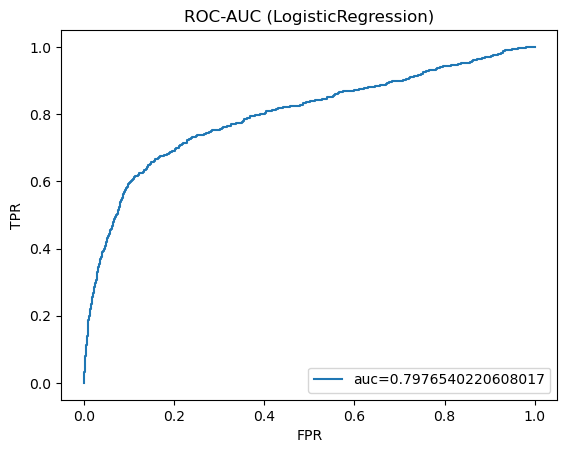

In [38]:
y_pred_proba_log_reg = log_reg_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_log_reg)
auc = roc_auc_score(y_test, y_pred_proba_log_reg)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-AUC (LogisticRegression)')
plt.savefig("artifacts/figures/ROC-AUC-LOG-REG.png")
plt.show()

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt_model = DecisionTreeClassifier()
params = {'max_depth': [3, 4, 5],
          'min_samples_leaf':[3, 5, 10],
          'criterion': ['gini', 'entropy', 'log_loss'],
         'random_state': [42]}
search = GridSearchCV(dt_model, params, cv= 5).fit(X_train, y_train)

print('best_score: ',search.best_score_)
print('best_params: ', search.best_params_)

best_score:  0.7977777777777778
best_params:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'random_state': 42}


In [40]:
results.append(evaluate_on_test(search, X_test, y_test, "DecisionTreeClassifier"))
best_models["DecisionTreeClassifier"] = search.best_estimator_

search_summaries["DecisionTreeClassifier"] = {
    "best_params": search.best_params_,
    "best_cv_roc_auc": float(search.best_score_),
}

In [41]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5, min_samples_leaf=5, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

dt_acc = accuracy_score(y_pred_dt, y_test)
dt_f1 = f1_score(y_pred_dt, y_test)
dt_roc_auc_score = roc_auc_score(y_pred_dt, y_test)
matrix_dt = confusion_matrix(y_test, y_pred_dt)

print(f"Показатель DecisionTreeClassifier:\n"
f"Accuracy: {dt_acc}\nF1score: {dt_f1}\nROC_AUC Score: {dt_roc_auc_score}\nconfusion_matrix: \n{matrix_dt}")


Показатель DecisionTreeClassifier:
Accuracy: 0.7886111111111112
F1score: 0.4889187374076561
ROC_AUC Score: 0.7394999230058514
confusion_matrix: 
[[2475  180]
 [ 581  364]]


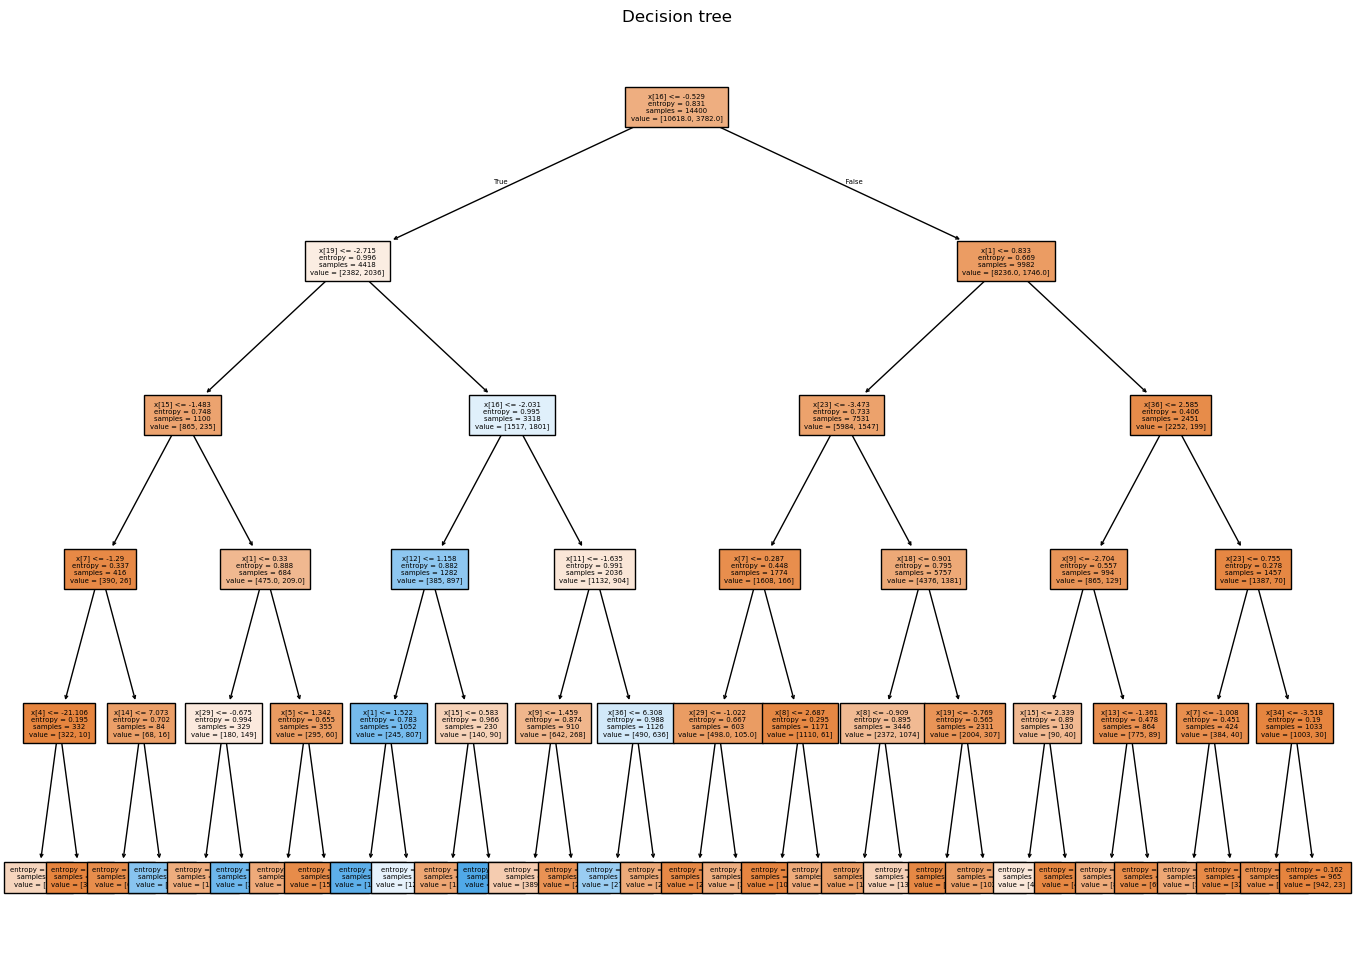

In [42]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(17, 12))
plot_tree(dt_model, filled=True, fontsize=5)
plt.title("Decision tree")
plt.savefig("artifacts/figures/Decision Tree.png")
plt.show()

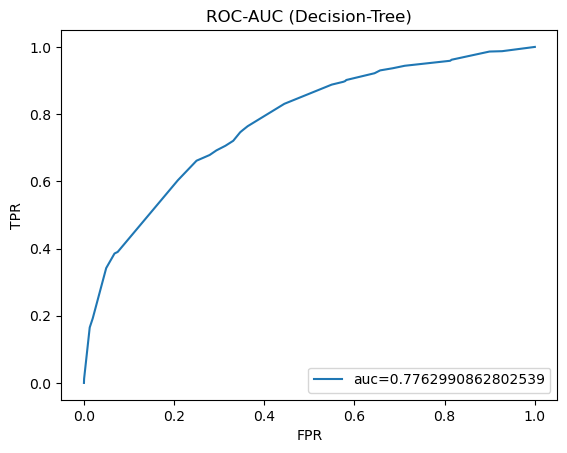

In [43]:
y_pred_proba_dt = dt_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_dt)
auc = roc_auc_score(y_test, y_pred_proba_dt)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-AUC (Decision-Tree)')
plt.savefig("artifacts/figures/ROC-AUC-DT.png")
plt.show()

In [44]:
# RandomForestClassifier

rf_model = RandomForestClassifier()
params = {'max_features': ['sqrt', 'log2'],
          'min_samples_leaf':[1, 2, 5],
          'max_depth': [3, 5, 7],
         'random_state': [42]}
search = GridSearchCV(rf_model, params, cv= 5).fit(X_train, y_train)

print('best_score: ',search.best_score_)
print('best_params: ', search.best_params_)

best_score:  0.8345833333333333
best_params:  {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'random_state': 42}


In [45]:
results.append(evaluate_on_test(search, X_test, y_test, "Random Forest Claasifier"))
best_models["Random Forest Claasifier"] = search.best_estimator_

search_summaries["Random Forest Claasifier"] = {
    "best_params": search.best_params_,
    "best_cv_roc_auc": float(search.best_score_),
}

In [46]:
rf_model = RandomForestClassifier(max_features = 'sqrt',max_depth=7, min_samples_leaf=1, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

rf_acc = accuracy_score(y_pred_rf, y_test)
rf_f1 = f1_score(y_pred_rf, y_test)
rf_roc_auc_score = roc_auc_score(y_pred_rf, y_test)
matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Показатель Random Forest Claasifier:\n"
f"Accuracy: {rf_acc}\nF1score: {rf_f1}\nROC_AUC Score: {rf_roc_auc_score}\nconfusion_matrix: \n{matrix_rf}")


Показатель Random Forest Claasifier:
Accuracy: 0.8375
F1score: 0.5788336933045356
ROC_AUC Score: 0.8666760867331209
confusion_matrix: 
[[2613   42]
 [ 543  402]]


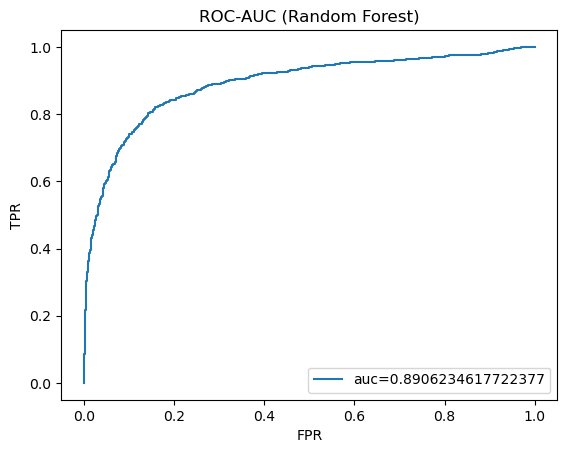

In [47]:
y_pred_proba_rf = rf_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_rf)
auc = roc_auc_score(y_test, y_pred_proba_rf)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-AUC (Random Forest)')
plt.savefig("artifacts/figures/ROC-AUC-RF.png")
plt.show()

In [48]:
# AdaBoost

from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier()
params = {'learning_rate': [1, 10, 0.1],
          'n_estimators':[50, 25, 100],
         'random_state': [42]}
search = GridSearchCV(ada_model, params, cv= 5).fit(X_train, y_train)

print('best_score: ',search.best_score_)
print('best_params: ', search.best_params_)

best_score:  0.8186111111111112
best_params:  {'learning_rate': 1, 'n_estimators': 100, 'random_state': 42}


In [49]:
results.append(evaluate_on_test(search, X_test, y_test, "AdaBoost"))
best_models["AdaBoost"] = search.best_estimator_

search_summaries["AdaBoost"] = {
    "best_params": search.best_params_,
    "best_cv_roc_auc": float(search.best_score_),
}

In [50]:
ada_model = AdaBoostClassifier(learning_rate = 1,n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)

ada_acc = accuracy_score(y_pred_ada, y_test)
ada_f1 = f1_score(y_pred_ada, y_test)
ada_roc_auc_score = roc_auc_score(y_pred_ada, y_test)
matrix_ada = confusion_matrix(y_test, y_pred_ada)

print(f"Показатель AdaBoost:\n"
f"Accuracy: {ada_acc}\nF1score: {ada_f1}\nROC_AUC Score: {ada_roc_auc_score}\nconfusion_matrix: \n{matrix_ada}")


Показатель AdaBoost:
Accuracy: 0.8141666666666667
F1score: 0.5624591236102028
ROC_AUC Score: 0.7827727008466263
confusion_matrix: 
[[2501  154]
 [ 515  430]]


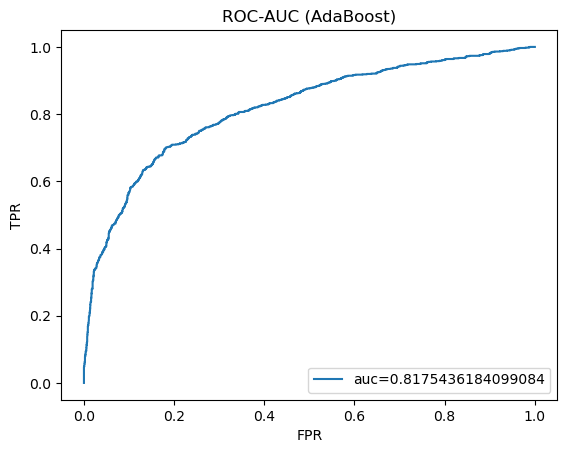

In [51]:
y_pred_proba_ada = ada_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_ada)
auc = roc_auc_score(y_test, y_pred_proba_ada)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-AUC (AdaBoost)')
plt.savefig("artifacts/figures/ROC-AUC-ADA.png")
plt.show()

In [52]:
# Сводка результатов в таблицу.

df = pd.DataFrame(results)

df_sorted = df.copy()
df_sorted["roc_auc_sort"] = df_sorted["roc_auc"].fillna(-1.0)
df_sorted = df_sorted.sort_values(["roc_auc_sort", "accuracy"], ascending=False).drop(columns=["roc_auc_sort"])

df_sorted

,accuracy,f1,roc_auc,model
3,0.837500,0.578834,0.890623,Random Forest Claasifier
4,0.814167,0.562459,0.817544,AdaBoost
1,0.812500,0.560833,0.797654,LogisticRegression
2,0.788611,0.488919,0.776299,DecisionTreeClassifier
0,0.737500,0.000000,0.500000,Dummy(most_frequent)


In [53]:
metrics_path = ARTIFACTS_DIR / "metrics_test.json"
search_path = ARTIFACTS_DIR / "search_summaries.json"

save_json({"results": df_sorted.to_dict(orient="records")}, metrics_path)
save_json(search_summaries, search_path)

print("Saved:", metrics_path)
print("Saved:", search_path)

Saved: artifacts\metrics_test.json
Saved: artifacts\search_summaries.json


In [54]:
# Лучшая модель:

best_row = df_sorted.iloc[0]
best_label = best_row["model"]
best_model = best_models[best_label]

best_label, best_row.to_dict()

('Random Forest Claasifier',
 {'accuracy': 0.8375,
  'f1': 0.5788336933045356,
  'roc_auc': 0.8906234617722377,
  'model': 'Random Forest Claasifier'})

In [58]:
y_test

818      1
4680     0
17986    1
13647    1
8452     0
        ..
5401     0
7085     1
12820    1
10839    0
9997     0
Name: target, Length: 3600, dtype: int64

Confusion Matrix: 
 [[2613   42]
 [ 543  402]]


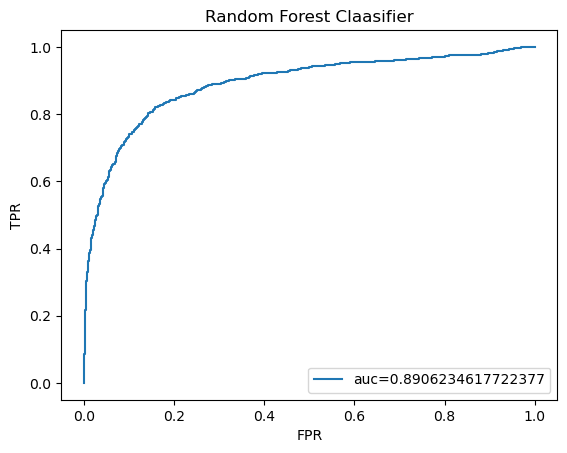

In [60]:
y_pred_proba = best_model.predict_proba(X_test)[::, 1]
y_pred = best_model.predict(X_test)
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(f"{best_label}")
plt.savefig("artifacts/figures/ROC-AUC-BEST-MODEL.png")
plt.show()

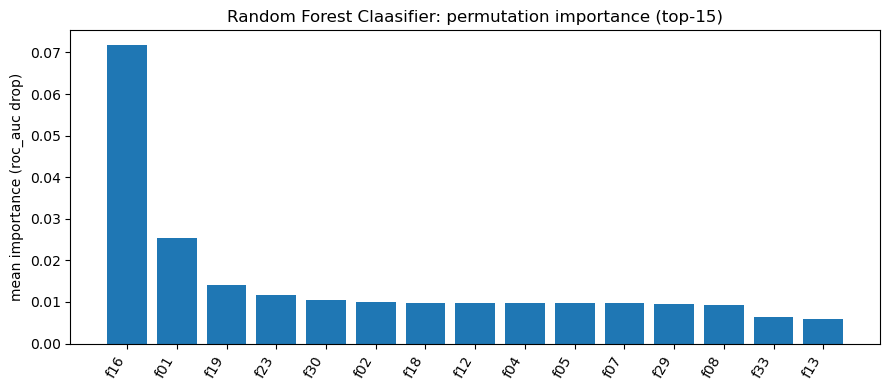


Топ-15 важных признаков:
 1. f16: 0.071742
 2. f01: 0.025428
 3. f19: 0.014173
 4. f23: 0.011690
 5. f30: 0.010492
 6. f02: 0.010118
 7. f18: 0.009869
 8. f12: 0.009801
 9. f04: 0.009739
10. f05: 0.009681
11. f07: 0.009643
12. f29: 0.009495
13. f08: 0.009197
14. f33: 0.006416
15. f13: 0.006008


In [65]:
# permutation importance 
from sklearn.inspection import permutation_importance

scoring = "roc_auc" if hasattr(best_model, "predict_proba") else "accuracy"

perm = permutation_importance(
    best_model,
    X_test,
    y_test,
    n_repeats=8,
    random_state=42,
    scoring=scoring
)

imp = perm.importances_mean

idx = np.argsort(imp)[::-1][:15]  # индексы топ-15 признаков

top_features = X_test.columns[idx]  # ТОЛЬКО названия выбранных признаков
top_importances = imp[idx]  # ТОЛЬКО важности выбранных признаков

plt.figure(figsize=(9, 4))
plt.bar(range(len(top_importances)), top_importances)
plt.xticks(range(len(top_importances)), top_features, rotation=60, ha="right")
plt.ylabel(f"mean importance ({scoring} drop)")
plt.title(f"{best_label}: permutation importance (top-15)")
plt.tight_layout()
plt.savefig("artifacts/figures/TOP-15-FEATURES.png")
plt.show()

print("\nТоп-15 важных признаков:")
for i, (feature, importance) in enumerate(zip(top_features, top_importances), 1):
    print(f"{i:2}. {feature}: {importance:.6f}")

In [66]:
import joblib

model_path = ARTIFACTS_DIR / "best_model.joblib"
joblib.dump(best_model, model_path)

meta = {
    "best_model_label": best_label,
    "test_metrics": best_row.to_dict(),
    "search_summary": search_summaries.get(best_label, None),
    "random_state": 42,
}
save_json(meta, ARTIFACTS_DIR / "best_model_meta.json")

print("Saved:", model_path)
print("Saved:", ARTIFACTS_DIR / "best_model_meta.json")

Saved: artifacts\best_model.joblib
Saved: artifacts\best_model_meta.json
